<a href="https://colab.research.google.com/github/Liza-IITP/MachineLearning/blob/main/SimpleLinearRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class SimpleLR  :
  def __init__(self) :
    self.m = None
    self.b = None
  def fit(self,X_train,Y_train) :
    X_train = X_train.to_numpy()
    Y_train = Y_train.to_numpy()
    num = 0
    den = 0
    for i in range(X_train.shape[0]) :
      num = num + (X_train[i]-X_train.mean())*(Y_train[i]-Y_train.mean())
      den = den + (X_train[i]-X_train.mean())**2
    self.m = num/den
    self.b = Y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)
  def predict(self,X_test) :
    return self.m * X_test + self.b


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv")

In [ ]:
df.rename(columns={'Experience Years':'YearsOfExperience','Salary':'Salary/month'}, inplace=True)
df.describe()


,YearsOfExperience,Salary/month
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [ ]:
X=df.iloc[:,0]
Y= df.iloc[:,1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(28,)

In [ ]:
lr = SimpleLR()

In [ ]:
lr.fit(X_train,Y_train)


9459.359534830563
26767.86524944281


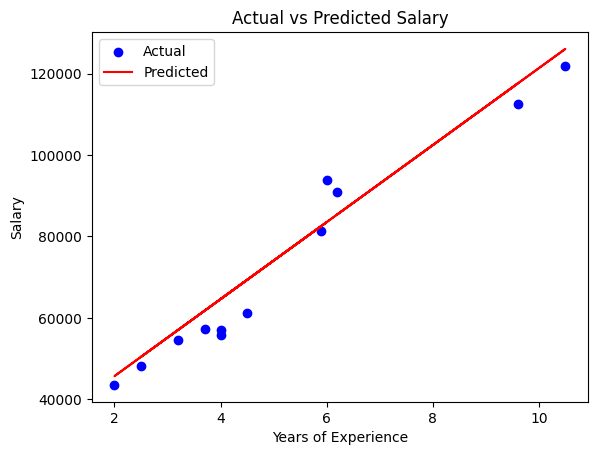

In [ ]:

import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, lr.predict(X_test), color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()


In [ ]:
def mae(y_test , y_predicted) :
  return np.mean(np.abs(y_test - y_predicted))

def mse(y_test , y_predicted) :
  return np.mean((y_test - y_predicted)**2)

def rmse(y_test , y_predicted) :
  return np.sqrt(np.mean((y_test - y_predicted)**2))

def r2(y_test , y_predicted) :
  return 1 - (np.sum((y_test - y_predicted)**2) / np.sum((y_test - y_test.mean())**2))

def adjustedr2(y_test, y_predicted, X_test):
    X_test = X_test.to_numpy()
    if len(X_test.shape) == 1:
      X_test = X_test.reshape(-1, 1)
    n = X_test.shape[0]
    p = X_test.shape[1]
    return 1 - (1 - r2(y_test, y_predicted)) * (n - 1) / (n - p - 1)



In [ ]:
# Accuracy
print(mae(Y_test, lr.predict(X_test)))
print(mse(Y_test, lr.predict(X_test)))
print(rmse(Y_test, lr.predict(X_test)))
print(r2(Y_test, lr.predict(X_test)))
print(adjustedr2(Y_test, lr.predict(X_test), X_test))

5211.981371554558
35344480.17477033
5945.122385180168
0.9439054952900567
0.9382960448190624
